# Trabalho Pratico 1 - Inteligência Artificial
Igor Paschoalino

Neste trabalho, será verificado e analizado alguns métodos de Inteligência artificial para reconhecimento e classificação de exoplanetas utilizando a base de dados koi_data.csv


--------------------------------------------------------------------------------
## Normalização e tratamento da data
Para começarmos este trabalho, vamos pegar a base de dados e fazer alguns tratamentos e normalizações com o objetivo de padronizar as entradas dos modelos

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [ ]:
# Carregar os dados do arquivo CSV
dados = pd.read_csv('koi_data.csv')
dados.head()

,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,K00752.01,CONFIRMED,9.48804,0.146,2.95750,615.8,0.02234,3.20796,2.26,0.0853,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,K00752.02,CONFIRMED,54.41838,0.586,4.50700,874.8,0.02795,3.02368,2.83,0.2734,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,K00754.01,FALSE POSITIVE,1.73695,1.276,2.40641,8079.2,0.38739,0.22080,33.46,0.0267,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
3,K00755.01,CONFIRMED,2.52559,0.701,1.65450,603.3,0.02406,1.98635,2.75,0.0374,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
4,K00114.01,FALSE POSITIVE,7.36179,1.169,5.02200,233.7,0.18339,0.00485,39.21,0.0820,...,-13.450,24.090,0.00303,-0.00555,-4.506,7.710,8.930,-4.537,7.713,8.948


In [ ]:
# Definir o alvo e as características
alvo = dados['koi_disposition']
features = dados.drop(columns=['koi_disposition', 'kepoi_name'])

# Normalizar os dados (escalonamento MinMax)
escalonador_minmax = preprocessing.MinMaxScaler()
dados_escalonados = escalonador_minmax.fit_transform(features.values)
dados_escalonados = pd.DataFrame(dados_escalonados, columns=features.columns)
dados_escalonados.head()

,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,0.008573,0.001448,0.020608,0.000712,0.000211,0.003492,0.000011,0.038524,0.996124,0.072275,...,0.739274,0.802901,0.770674,0.137836,0.319887,0.735977,0.002257,0.337466,0.713451,0.003571
1,0.050528,0.005813,0.031801,0.001011,0.000267,0.003291,0.000014,0.131308,0.995097,0.036189,...,0.736435,0.803485,0.770840,0.137750,0.325841,0.734043,0.004402,0.343309,0.711688,0.005580
2,0.001335,0.012658,0.016627,0.009347,0.003866,0.000240,0.000167,0.009619,0.738798,0.134344,...,0.737825,0.801011,0.771295,0.137686,0.316329,0.735464,0.003262,0.332664,0.711494,0.003080
3,0.002072,0.006954,0.011196,0.000697,0.000228,0.002162,0.000013,0.014897,0.947668,0.135478,...,0.738095,0.801471,0.770728,0.137919,0.320482,0.733172,0.001129,0.337324,0.710761,0.000781
4,0.006588,0.011597,0.035521,0.000269,0.001823,0.000005,0.000195,0.036896,0.668453,0.128879,...,0.702100,0.849537,0.771297,0.136974,0.252962,0.808607,0.100790,0.271669,0.782124,0.099866


In [ ]:
# Normalizar os dados (escalonamento MinMax)
escalonador_minmax = preprocessing.MinMaxScaler()
dados_escalonados = escalonador_minmax.fit_transform(features.values)
dados_escalonados = pd.DataFrame(dados_escalonados, columns=features.columns)
dados_escalonados.head()

,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,0.008573,0.001448,0.020608,0.000712,0.000211,0.003492,0.000011,0.038524,0.996124,0.072275,...,0.739274,0.802901,0.770674,0.137836,0.319887,0.735977,0.002257,0.337466,0.713451,0.003571
1,0.050528,0.005813,0.031801,0.001011,0.000267,0.003291,0.000014,0.131308,0.995097,0.036189,...,0.736435,0.803485,0.770840,0.137750,0.325841,0.734043,0.004402,0.343309,0.711688,0.005580
2,0.001335,0.012658,0.016627,0.009347,0.003866,0.000240,0.000167,0.009619,0.738798,0.134344,...,0.737825,0.801011,0.771295,0.137686,0.316329,0.735464,0.003262,0.332664,0.711494,0.003080
3,0.002072,0.006954,0.011196,0.000697,0.000228,0.002162,0.000013,0.014897,0.947668,0.135478,...,0.738095,0.801471,0.770728,0.137919,0.320482,0.733172,0.001129,0.337324,0.710761,0.000781
4,0.006588,0.011597,0.035521,0.000269,0.001823,0.000005,0.000195,0.036896,0.668453,0.128879,...,0.702100,0.849537,0.771297,0.136974,0.252962,0.808607,0.100790,0.271669,0.782124,0.099866


Neste momento. vamos iniciar as variaveis que vão separar os dados para treino e teste. sendo 75% dos dados para treino e o restante para testes

In [ ]:
# Dividir os dados em treino (75%) e teste (25%)
X_treino, X_teste, y_treino, y_teste = train_test_split(dados_escalonados, alvo, test_size=0.25, random_state=300)

Aqui. para facilitar a formação dos gráficos, eu defini uma função que exibe uma matriz de confusão e um gráfico de barras comparando as classes reais e as preditas.

In [ ]:
def plotar_resultados(y_verdadeiro, y_predito, modelo_classes, titulo_matriz='Matriz de Confusão', titulo_comparacao='Comparação entre Classes Reais e Preditas'):
    """
    Gera a matriz de confusão e o gráfico de barras comparando classes reais e preditas.

    Parâmetros:
    - y_verdadeiro: Classes verdadeiras (dados de teste)
    - y_predito: Classes preditas pelo modelo
    - modelo_classes: Classes do modelo para os labels da matriz de confusão
    - titulo_matriz: Título para o gráfico da matriz de confusão
    - titulo_comparacao: Título para o gráfico de barras de comparação

    """

    # Gerar a matriz de confusão
    matriz_confusao = confusion_matrix(y_verdadeiro, y_predito)

    # Configurar o gráfico da matriz de confusão
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=modelo_classes, yticklabels=modelo_classes)

    # Adicionar títulos e labels
    plt.title(titulo_matriz)
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.show()

    # Gráfico de barras comparando classes reais e preditas
    plt.figure(figsize=(10, 5))
    sns.countplot(x=y_verdadeiro, label="Verdadeiro", color='blue', alpha=0.6)
    sns.countplot(x=y_predito, label="Predito", color='orange', alpha=0.6)

    # Adicionar título e legendas
    plt.title(titulo_comparacao)
    plt.legend(loc='upper right')
    plt.show()

--------------------------------------------------------------------------------
# Naive Bayes
O algoritmo Naive Bayes é um método de classificação baseado no Teorema de Bayes, assumindo que todas as características são independentes entre si, o que raramente é verdadeiro no mundo real. No entanto, essa suposição simplificadora torna o modelo extremamente eficiente, especialmente em situações de grandes conjuntos de dados e alta dimensionalidade.

Para este experimento, utilizamos o Gaussian Naive Bayes, uma variação do Naive Bayes que assume que os dados seguem uma distribuição normal (gaussiana). O inicioes com Naive Bayes foi motivado pelo seu uso como baseline para comparar a performance com outros modelos como pedido pelas especificaçôes do trabalho

Acurácia (Naive Bayes): 92.24%
Acurácia média (k-fold=5): 91.87%

Relatório de Classificação:
                precision    recall  f1-score   support

     CONFIRMED       0.85      0.97      0.91       520
FALSE POSITIVE       0.98      0.89      0.93       781

      accuracy                           0.92      1301
     macro avg       0.92      0.93      0.92      1301
  weighted avg       0.93      0.92      0.92      1301



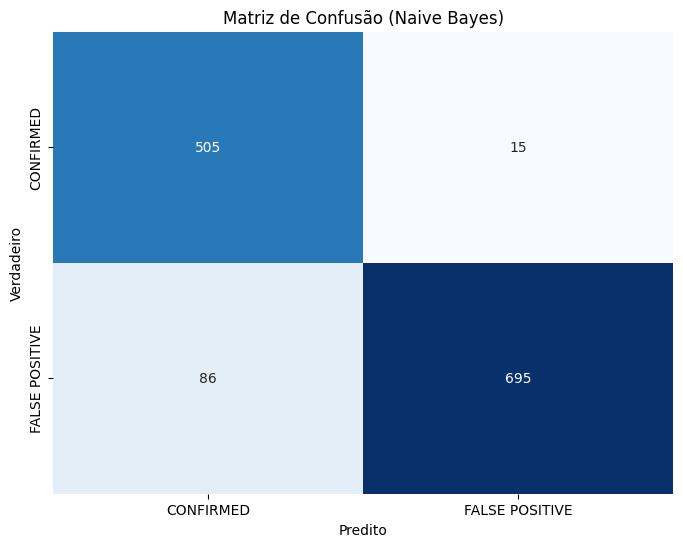

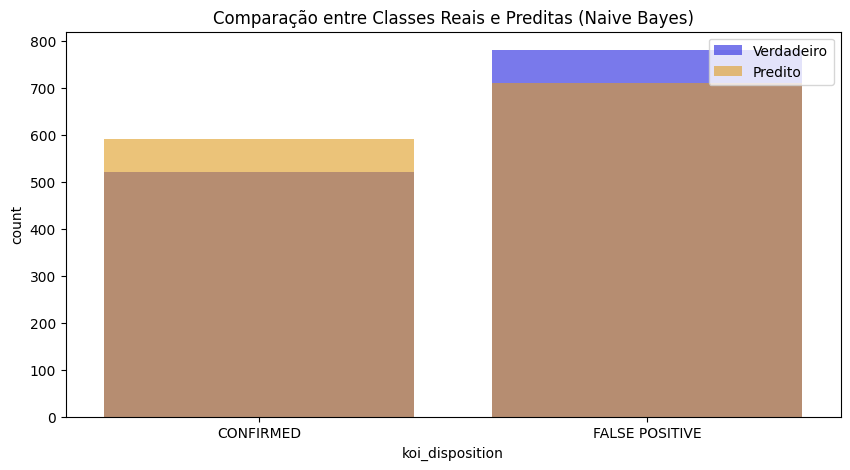

In [ ]:
from sklearn.naive_bayes import GaussianNB


# Passo 1: Inicializar o modelo Gaussian Naive Bayes
modelo_naive_bayes = GaussianNB()

# Passo 2: Treinar o modelo
modelo_naive_bayes.fit(X_treino, y_treino)

# Passo 3: Fazer previsões nos dados de teste
previsoes = modelo_naive_bayes.predict(X_teste)

# Passo 4: Avaliar o modelo com a acurácia
acuracia = accuracy_score(y_teste, previsoes) * 100
print(f"Acurácia (Naive Bayes): {acuracia:.2f}%")

# Passo 5: realizar testes com o k-fold=5
pontuacaok = cross_val_score(modelo_naive_bayes, dados_escalonados, alvo, cv=5, scoring='accuracy')
print(f'Acurácia média (k-fold=5): {pontuacaok.mean()*100:.2f}%')

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_teste, previsoes))

# Passo 5: Usar a função para gerar a matriz de confusão e gráficos de barras
plotar_resultados(y_teste, previsoes, modelo_naive_bayes.classes_,
                  titulo_matriz='Matriz de Confusão (Naive Bayes)',
                  titulo_comparacao='Comparação entre Classes Reais e Preditas (Naive Bayes)')


Podemos analizar pelos resultados gerados pelo Naive Bayes que ele conseguiu um resultados de 92% de acurácia, errando apenas 15 dos 520 exoplanetas confirmados e errando 86 dos 781 não-exoplanetas. sendo um bom resultado que servirá de baseline para experimentos com os outros modelos.

--------------------------------------------------------------------------------
# Decision tree

 Decision Tree é um algoritmo de classificação que divide os dados de maneira recursiva com base em atributos, criando uma estrutura em forma de árvore. Cada nó interno representa uma decisão com base em uma característica, e cada ramo leva a uma possível conclusão. Esse modelo é amplamente utilizado por ser interpretável, já que podemos visualizar o caminho de decisão de forma clara.

Para este experimento, utilizamos o Decision Tree Classifier e realizamos testes variando o tamanho máximo das árvores, incluindo a opção de altura ilimitada. O objetivo foi avaliar como a profundidade da árvore afeta a performance do modelo. Esses experimentos ajudaram a identificar o melhor tamanho de árvore para o conjunto de dados, maximizando a acurácia sem perder a generalização.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Teste feito com profundidade máxima ilimitada.

Acurácia (Decision Tree, max_depth=None): 94.93%
Acurácia média (k-fold=5): 94.08%

Relatório de Classificação:
                precision    recall  f1-score   support

     CONFIRMED       0.94      0.94      0.94       520
FALSE POSITIVE       0.96      0.96      0.96       781

      accuracy                           0.95      1301
     macro avg       0.95      0.95      0.95      1301
  weighted avg       0.95      0.95      0.95      1301



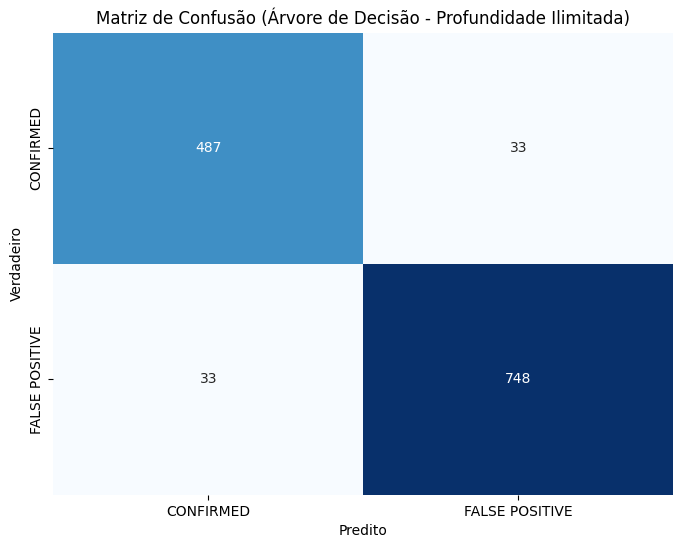

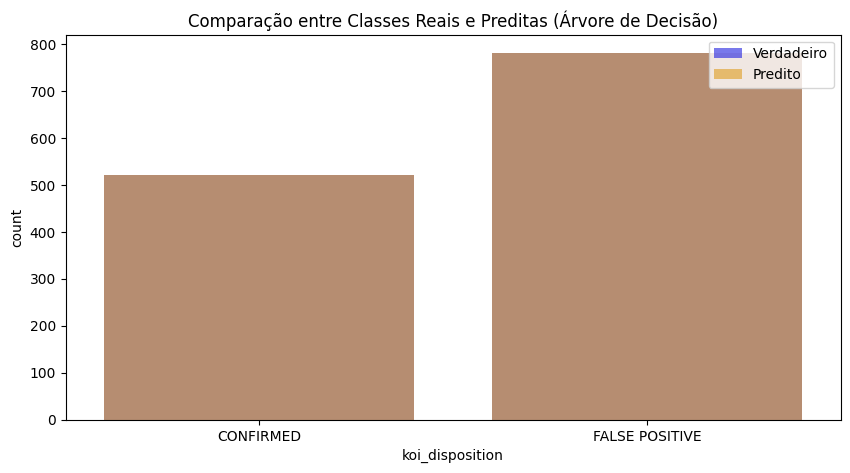

In [ ]:

# Passo 1: Inicializar o modelo de Árvore de Decisão
modelo_arvore_decisao = DecisionTreeClassifier(random_state=300, max_depth=None)

# Passo 2: Treinar o modelo
modelo_arvore_decisao.fit(X_treino, y_treino)

# Passo 3: Fazer previsões nos dados de teste
previsoes = modelo_arvore_decisao.predict(X_teste)

# Passo 4: Avaliar o modelo com a acurácia
acuracia = accuracy_score(y_teste, previsoes) * 100
print(f"Acurácia (Decision Tree, max_depth=None): {acuracia:.2f}%")

# Passo 5: realizar testes com o k-fold=5
pontuacaok = cross_val_score(modelo_arvore_decisao, dados_escalonados, alvo, cv=5, scoring='accuracy')
print(f'Acurácia média (k-fold=5): {pontuacaok.mean()*100:.2f}%')

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_teste, previsoes))

# Passo 5: Usar a função para gerar a matriz de confusão e gráficos de barras
plotar_resultados(y_teste, previsoes, modelo_arvore_decisao.classes_,
                  titulo_matriz='Matriz de Confusão (Árvore de Decisão - Profundidade Ilimitada)',
                  titulo_comparacao='Comparação entre Classes Reais e Preditas (Árvore de Decisão)')

Teste feito com profundidade máxima 3.

Acurácia (Decision Tree, max_depth=3): 93.85%
Acurácia média (k-fold=5): 91.64%

Relatório de Classificação:
                precision    recall  f1-score   support

     CONFIRMED       0.92      0.93      0.92       520
FALSE POSITIVE       0.95      0.94      0.95       781

      accuracy                           0.94      1301
     macro avg       0.94      0.94      0.94      1301
  weighted avg       0.94      0.94      0.94      1301



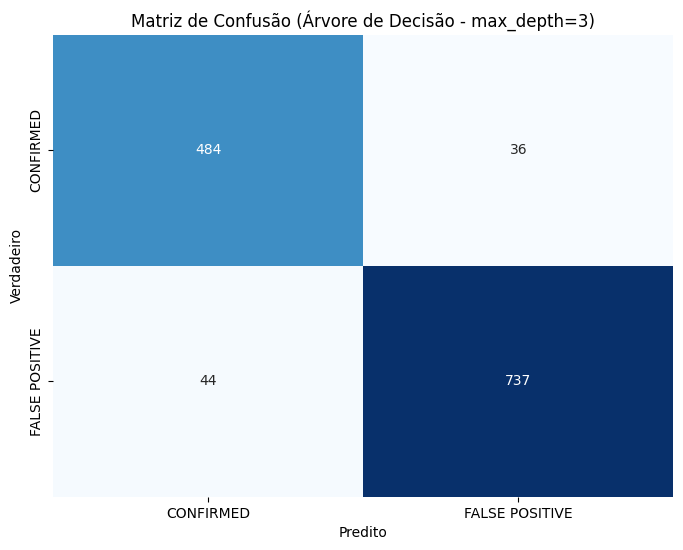

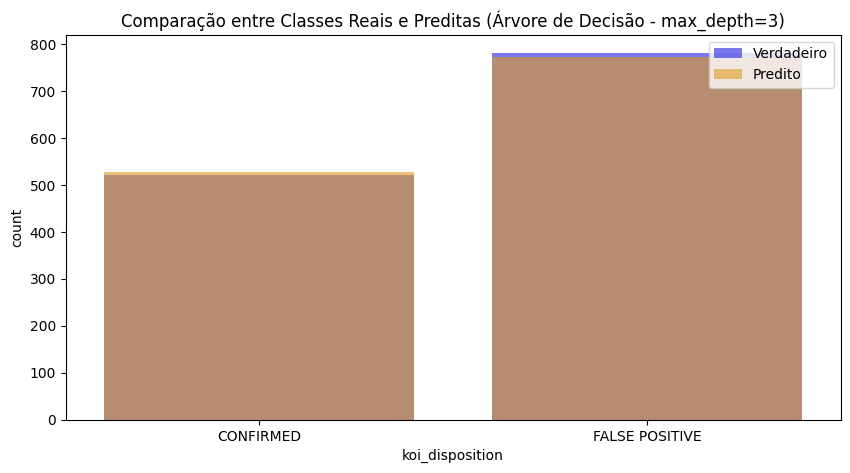

In [ ]:
# Passo 1: Inicializar o modelo de Árvore de Decisão com profundidade máxima de 3
modelo_arvore_decisao = DecisionTreeClassifier(random_state=300, max_depth=3)

# Passo 2: Treinar o modelo
modelo_arvore_decisao.fit(X_treino, y_treino)

# Passo 3: Fazer previsões nos dados de teste
previsoes = modelo_arvore_decisao.predict(X_teste)

# Passo 4: Avaliar o modelo com a acurácia
acuracia = accuracy_score(y_teste, previsoes) * 100
print(f"Acurácia (Decision Tree, max_depth=3): {acuracia:.2f}%")

# Passo 5: realizar testes com o k-fold=5
pontuacaok = cross_val_score(modelo_arvore_decisao, dados_escalonados, alvo, cv=5, scoring='accuracy')
print(f'Acurácia média (k-fold=5): {pontuacaok.mean()*100:.2f}%')

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_teste, previsoes))

# Passo 5: Usar a função para gerar a matriz de confusão e gráficos de barras
plotar_resultados(y_teste, previsoes, modelo_arvore_decisao.classes_,
                  titulo_matriz='Matriz de Confusão (Árvore de Decisão - max_depth=3)',
                  titulo_comparacao='Comparação entre Classes Reais e Preditas (Árvore de Decisão - max_depth=3)')

Teste feito com profundidade máxima 5

Acurácia (Decision Tree, max_depth=5): 94.70%
Acurácia média (k-fold=5): 94.27%

Relatório de Classificação:
                precision    recall  f1-score   support

     CONFIRMED       0.92      0.95      0.93       520
FALSE POSITIVE       0.97      0.94      0.96       781

      accuracy                           0.95      1301
     macro avg       0.94      0.95      0.95      1301
  weighted avg       0.95      0.95      0.95      1301



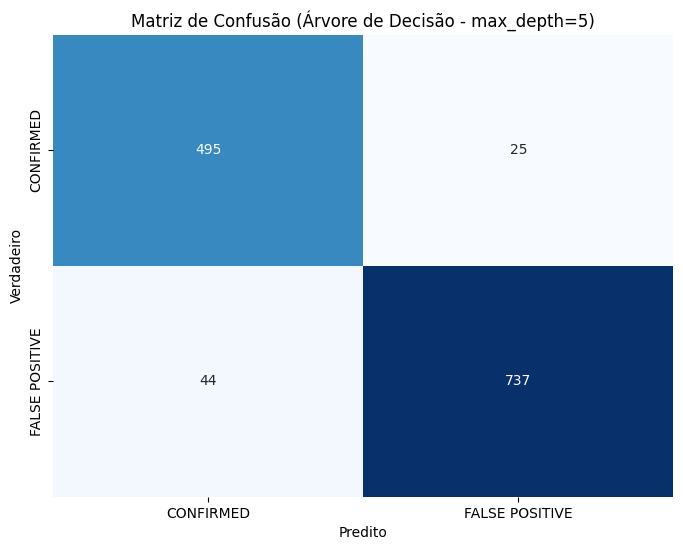

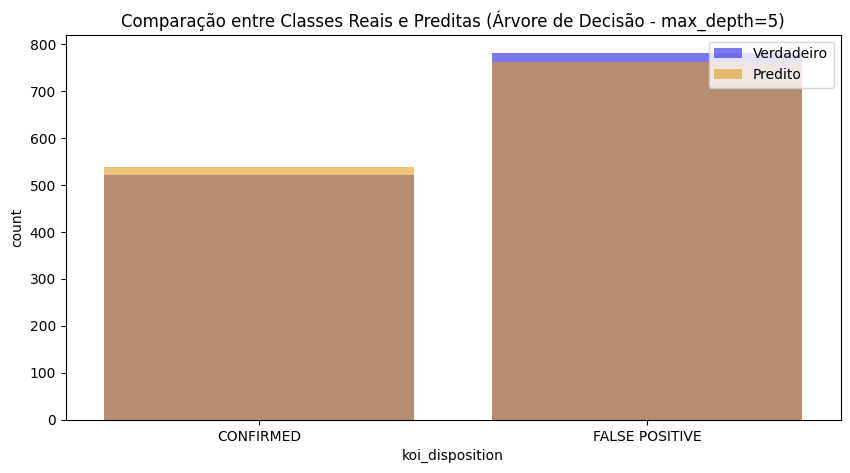

In [ ]:

# Passo 1: Inicializar o modelo de Árvore de Decisão com profundidade máxima de 5
modelo_arvore_decisao = DecisionTreeClassifier(random_state=300, max_depth=5)

# Passo 2: Treinar o modelo
modelo_arvore_decisao.fit(X_treino, y_treino)

# Passo 3: Fazer previsões nos dados de teste
previsoes = modelo_arvore_decisao.predict(X_teste)

# Passo 4: Avaliar o modelo com a acurácia
acuracia = accuracy_score(y_teste, previsoes) * 100
print(f"Acurácia (Decision Tree, max_depth=5): {acuracia:.2f}%")

# Passo 5: realizar testes com o k-fold=5
pontuacaok = cross_val_score(modelo_arvore_decisao, dados_escalonados, alvo, cv=5, scoring='accuracy')
print(f'Acurácia média (k-fold=5): {pontuacaok.mean()*100:.2f}%')

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_teste, previsoes))

# Passo 5: Usar a função para gerar a matriz de confusão e gráficos de barras
plotar_resultados(y_teste, previsoes, modelo_arvore_decisao.classes_,
                  titulo_matriz='Matriz de Confusão (Árvore de Decisão - max_depth=5)',
                  titulo_comparacao='Comparação entre Classes Reais e Preditas (Árvore de Decisão - max_depth=5)')

Teste feito com profundidade máxima 15

Acurácia (Decision Tree, max_depth=15): 95.23%
Acurácia média (k-fold=5): 94.25%

Relatório de Classificação:
                precision    recall  f1-score   support

     CONFIRMED       0.93      0.95      0.94       520
FALSE POSITIVE       0.97      0.95      0.96       781

      accuracy                           0.95      1301
     macro avg       0.95      0.95      0.95      1301
  weighted avg       0.95      0.95      0.95      1301



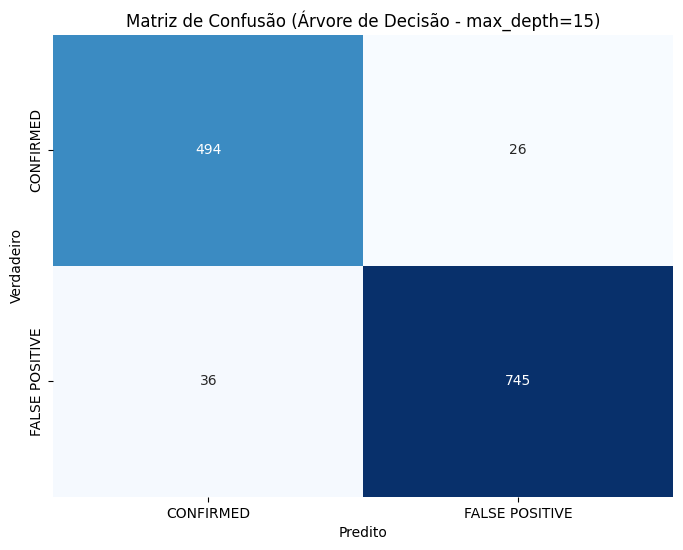

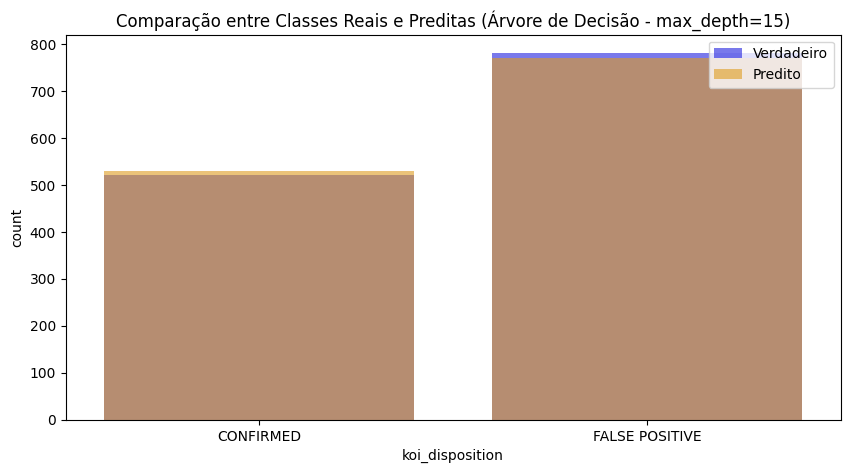

In [ ]:

# Passo 1: Inicializar o modelo de Árvore de Decisão com profundidade máxima de 15
modelo_arvore_decisao = DecisionTreeClassifier(random_state=300, max_depth=15)

# Passo 2: Treinar o modelo
modelo_arvore_decisao.fit(X_treino, y_treino)

# Passo 3: Fazer previsões nos dados de teste
previsoes = modelo_arvore_decisao.predict(X_teste)

# Passo 4: Avaliar o modelo com a acurácia
acuracia = accuracy_score(y_teste, previsoes) * 100
print(f"Acurácia (Decision Tree, max_depth=15): {acuracia:.2f}%")

# Passo 5: realizar testes com o k-fold=5
pontuacaok = cross_val_score(modelo_arvore_decisao, dados_escalonados, alvo, cv=5, scoring='accuracy')
print(f'Acurácia média (k-fold=5): {pontuacaok.mean()*100:.2f}%')

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_teste, previsoes))

# Passo 5: Usar a função para gerar a matriz de confusão e gráficos de barras
plotar_resultados(y_teste, previsoes, modelo_arvore_decisao.classes_,
                  titulo_matriz='Matriz de Confusão (Árvore de Decisão - max_depth=15)',
                  titulo_comparacao='Comparação entre Classes Reais e Preditas (Árvore de Decisão - max_depth=15)')

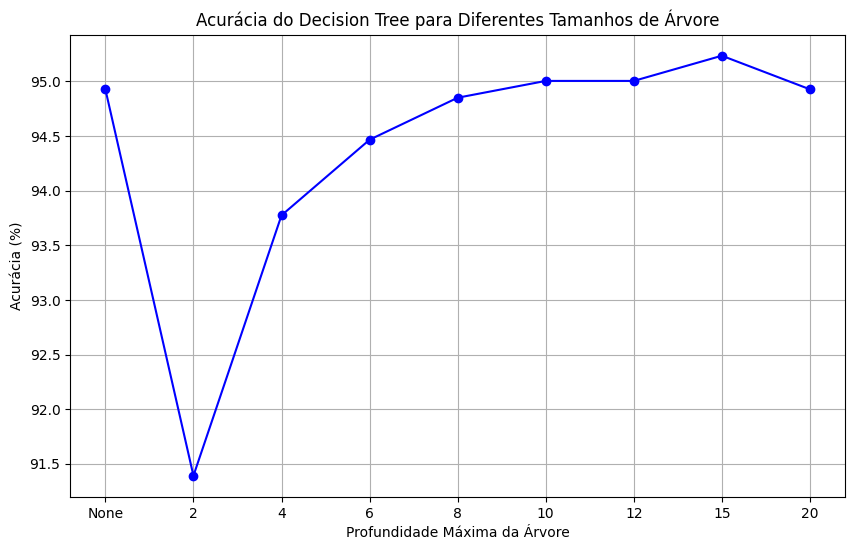

In [ ]:
def plotar_acuracia_decision_tree():
    # Lista de alturas máximas a serem testadas
    max_depths = [None, 2, 4, 6, 8, 10, 12, 15, 20]
    acuracias_dt = []

    # Iterar sobre cada valor de altura máxima
    for depth in max_depths:
        # Passo 1: Inicializar o modelo Decision Tree com altura máxima variável
        modelo_dt = DecisionTreeClassifier(max_depth=depth, random_state=300)

        # Passo 2: Treinar o modelo
        modelo_dt.fit(X_treino, y_treino)

        # Passo 3: Fazer previsões nos dados de teste
        previsoes = modelo_dt.predict(X_teste)

        # Passo 4: Avaliar o modelo com a acurácia
        acuracia = accuracy_score(y_teste, previsoes)
        acuracias_dt.append(acuracia * 100)  # Converter acurácia para %

    # Plotando a Acurácia para diferentes tamanhos de árvore
    plt.figure(figsize=(10, 6))
    plt.plot([str(depth) for depth in max_depths], acuracias_dt, marker='o', linestyle='-', color='blue')
    plt.title('Acurácia do Decision Tree para Diferentes Tamanhos de Árvore')
    plt.xlabel('Profundidade Máxima da Árvore')
    plt.ylabel('Acurácia (%)')
    plt.grid(True)
    plt.show()

# Chamar a função para plotar o gráfico
plotar_acuracia_decision_tree()

Podemos observar com os resultados obtidos pelo k-fold, um destaque de quando temos um tamanho 15 de profundidade e um decrescimo de acurácia quando temos apenas 2, de restante ela se mantém entre os 93 a 95% de precisão, tendo seu resultado aproximado com o Naive Bayes.

--------------------------------------------------------------------------------
# Support Vector Machines (SVM)

O SVM é um algoritmo de aprendizado supervisionado que busca encontrar um hiperplano de separação ótimo entre as classes, maximizando a margem entre os pontos de dados mais próximos de cada classe, conhecidos como vetores de suporte. O SVM é amplamente utilizado para problemas de classificação por sua capacidade de lidar com dados de alta dimensionalidade e sua robustez em casos de separação não linear.

Neste experimento, foram testados diferentes kernels: o linear, que traça uma linha reta entre as classes; o sigmoid, que transforma os dados para um espaço não linear, similar às redes neurais; o polinomial, que permite a criação de fronteiras de decisão mais complexas ao elevar os atributos a uma determinada potência; e o RBF (Radial Basis Function), que é um dos kernels mais usados devido à sua flexibilidade em lidar com dados que não são linearmente separáveis.

O objetivo foi avaliar como cada kernel influencia a performance do modelo e qual se ajusta melhor aos dados. Esses testes nos ajudaram a identificar o kernel mais adequado, considerando tanto a acurácia quanto a capacidade de generalização.

In [ ]:
from sklearn.svm import SVC

Teste feito com kernel linear.

Acurácia (SVM com Kernel Linear): 90.85%
Acurácia média (k-fold=5): 91.04%

Relatório de Classificação:
                precision    recall  f1-score   support

     CONFIRMED       0.86      0.93      0.89       520
FALSE POSITIVE       0.95      0.90      0.92       781

      accuracy                           0.91      1301
     macro avg       0.90      0.91      0.91      1301
  weighted avg       0.91      0.91      0.91      1301



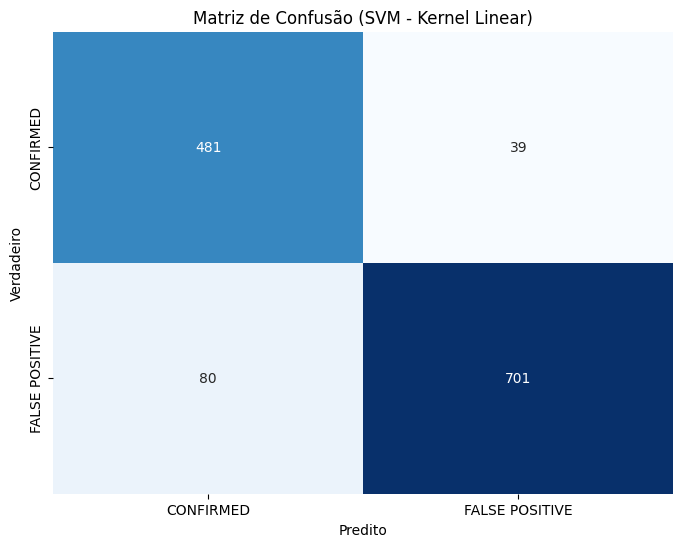

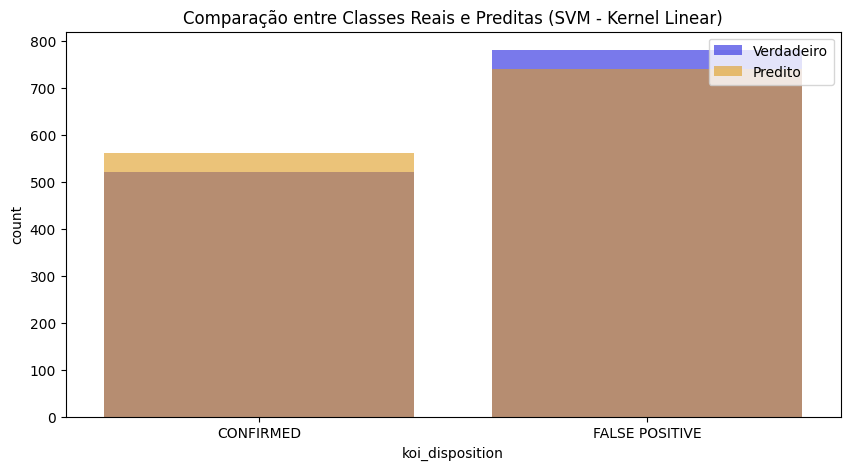

In [ ]:
# Passo 1: Inicializar o modelo SVM com kernel linear
modelo_svm_linear = SVC(kernel='linear', random_state=300)

# Passo 2: Treinar o modelo
modelo_svm_linear.fit(X_treino, y_treino)

# Passo 3: Fazer previsões nos dados de teste
previsoes = modelo_svm_linear.predict(X_teste)

# Passo 4: Avaliar o modelo com a acurácia
acuracia = accuracy_score(y_teste, previsoes) * 100
print(f"Acurácia (SVM com Kernel Linear): {acuracia:.2f}%")

# Passo 5: realizar testes com o k-fold=5
pontuacaok = cross_val_score(modelo_svm_linear, dados_escalonados, alvo, cv=5, scoring='accuracy')
print(f'Acurácia média (k-fold=5): {pontuacaok.mean()*100:.2f}%')

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_teste, previsoes))

# Passo 5: Usar a função para gerar a matriz de confusão e gráficos de barras
plotar_resultados(y_teste, previsoes, modelo_svm_linear.classes_,
                  titulo_matriz='Matriz de Confusão (SVM - Kernel Linear)',
                  titulo_comparacao='Comparação entre Classes Reais e Preditas (SVM - Kernel Linear)')


Teste feito com kernel sigmoid.

Acurácia (SVM com Kernel Sigmoid): 50.73%
Acurácia média (k-fold=5): 52.06%

Relatório de Classificação:
                precision    recall  f1-score   support

     CONFIRMED       0.38      0.36      0.37       520
FALSE POSITIVE       0.59      0.61      0.60       781

      accuracy                           0.51      1301
     macro avg       0.48      0.48      0.48      1301
  weighted avg       0.50      0.51      0.50      1301



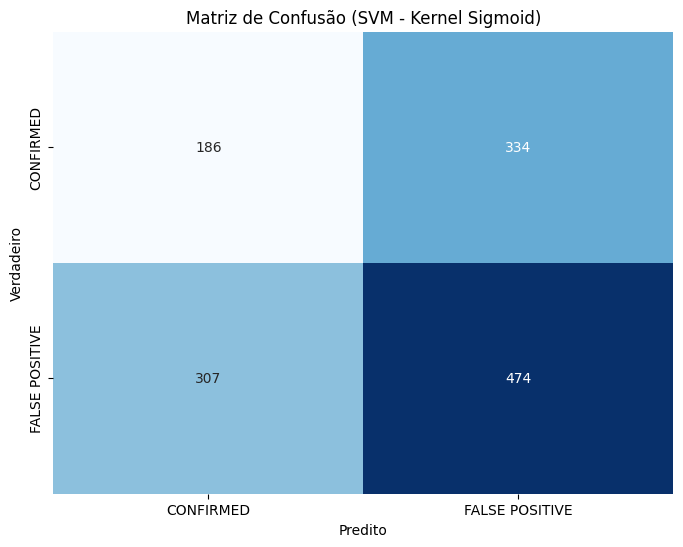

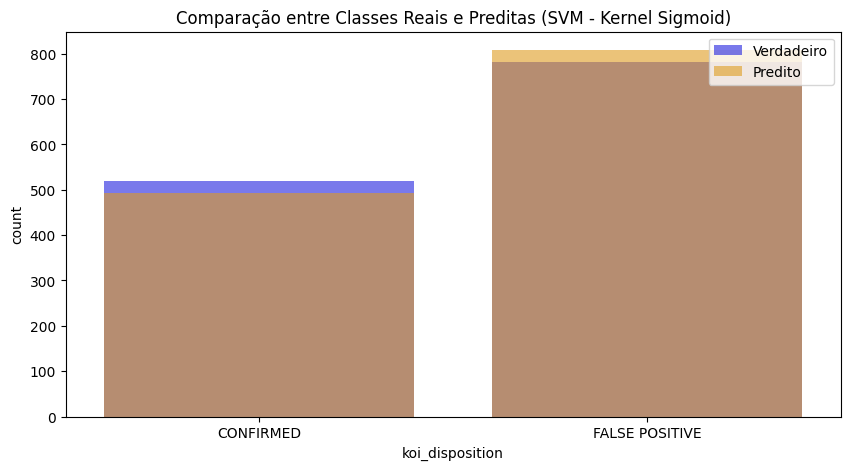

In [ ]:
# Passo 1: Inicializar o modelo SVM com kernel sigmoid
modelo_svm_sigmoid = SVC(kernel='sigmoid', random_state=300)

# Passo 2: Treinar o modelo
modelo_svm_sigmoid.fit(X_treino, y_treino)

# Passo 3: Fazer previsões nos dados de teste
previsoes = modelo_svm_sigmoid.predict(X_teste)

# Passo 4: Avaliar o modelo com a acurácia
acuracia = accuracy_score(y_teste, previsoes) * 100
print(f"Acurácia (SVM com Kernel Sigmoid): {acuracia:.2f}%")

# Passo 5: realizar testes com o k-fold=5
pontuacaok = cross_val_score(modelo_svm_sigmoid, dados_escalonados, alvo, cv=5, scoring='accuracy')
print(f'Acurácia média (k-fold=5): {pontuacaok.mean()*100:.2f}%')

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_teste, previsoes))

# Passo 5: Usar a função para gerar a matriz de confusão e gráficos de barras
plotar_resultados(y_teste, previsoes, modelo_svm_sigmoid.classes_,
                  titulo_matriz='Matriz de Confusão (SVM - Kernel Sigmoid)',
                  titulo_comparacao='Comparação entre Classes Reais e Preditas (SVM - Kernel Sigmoid)')

Teste feito com kernel polinomial.

Acurácia (SVM com Kernel Polinomial): 91.85%
Acurácia média (k-fold=5): 92.14%

Relatório de Classificação:
                precision    recall  f1-score   support

     CONFIRMED       0.87      0.93      0.90       520
FALSE POSITIVE       0.95      0.91      0.93       781

      accuracy                           0.92      1301
     macro avg       0.91      0.92      0.92      1301
  weighted avg       0.92      0.92      0.92      1301



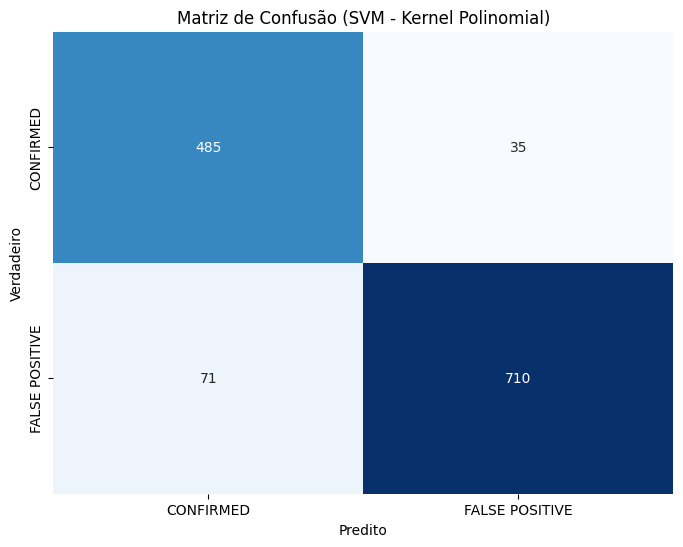

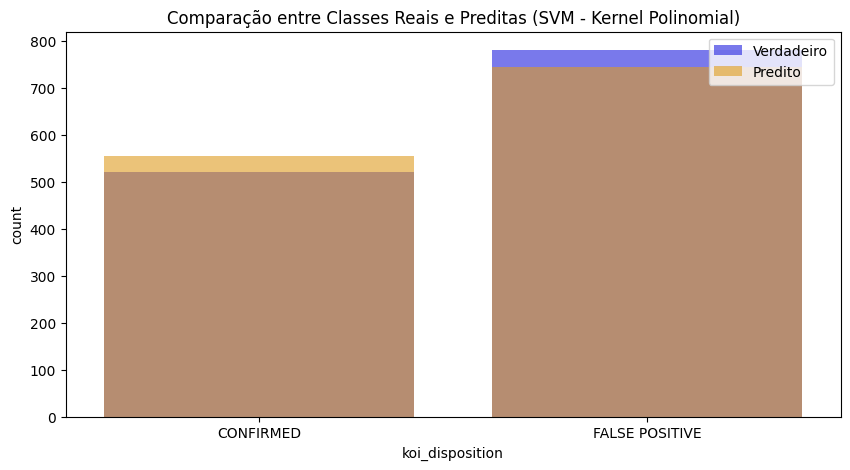

In [ ]:
# Passo 1: Inicializar o modelo SVM com kernel polinomial
modelo_svm_polinomial = SVC(kernel='poly', random_state=300)

# Passo 2: Treinar o modelo
modelo_svm_polinomial.fit(X_treino, y_treino)

# Passo 3: Fazer previsões nos dados de teste
previsoes = modelo_svm_polinomial.predict(X_teste)

# Passo 4: Avaliar o modelo com a acurácia
acuracia = accuracy_score(y_teste, previsoes) * 100
print(f"Acurácia (SVM com Kernel Polinomial): {acuracia:.2f}%")

# Passo 5: realizar testes com o k-fold=5
pontuacaok = cross_val_score(modelo_svm_polinomial, dados_escalonados, alvo, cv=5, scoring='accuracy')
print(f'Acurácia média (k-fold=5): {pontuacaok.mean()*100:.2f}%')

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_teste, previsoes))

# Passo 5: Usar a função para gerar a matriz de confusão e gráficos de barras
plotar_resultados(y_teste, previsoes, modelo_svm_polinomial.classes_,
                  titulo_matriz='Matriz de Confusão (SVM - Kernel Polinomial)',
                  titulo_comparacao='Comparação entre Classes Reais e Preditas (SVM - Kernel Polinomial)')

Teste feito com kernel RBF.

Acurácia (SVM com Kernel RBF): 89.85%
Acurácia média (k-fold=5): 89.85%

Relatório de Classificação:
                precision    recall  f1-score   support

     CONFIRMED       0.85      0.91      0.88       520
FALSE POSITIVE       0.94      0.89      0.91       781

      accuracy                           0.90      1301
     macro avg       0.89      0.90      0.90      1301
  weighted avg       0.90      0.90      0.90      1301



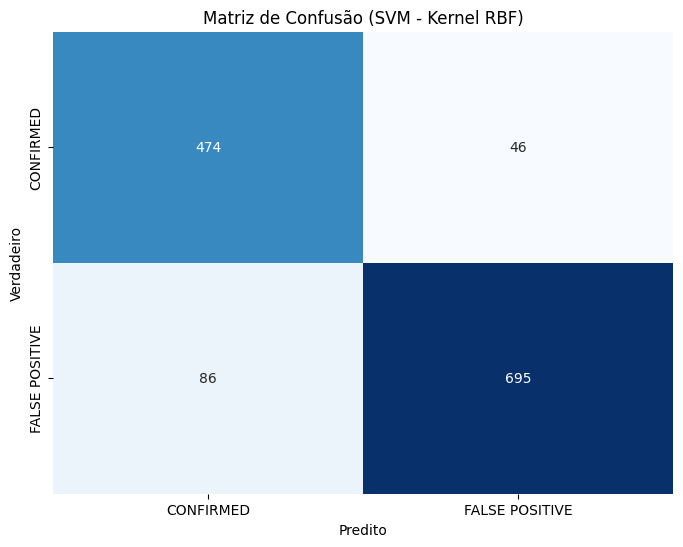

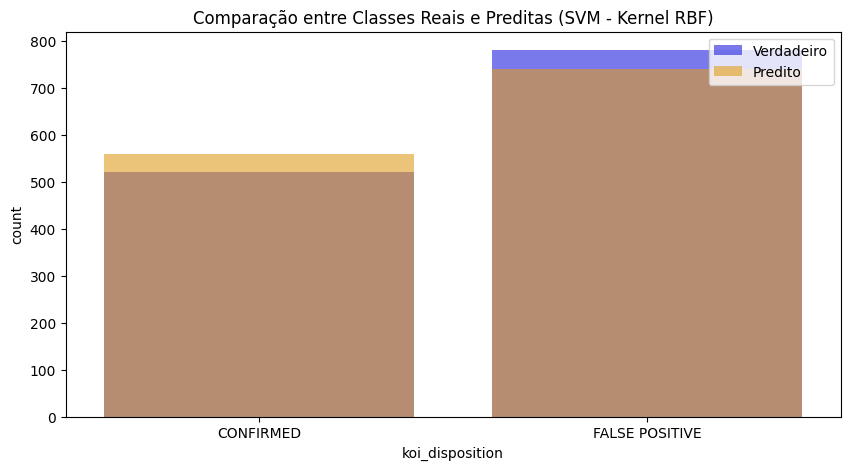

In [ ]:
# Passo 1: Inicializar o modelo SVM com kernel RBF
modelo_svm_rbf = SVC(kernel='rbf', random_state=300)

# Passo 2: Treinar o modelo
modelo_svm_rbf.fit(X_treino, y_treino)

# Passo 3: Fazer previsões nos dados de teste
previsoes = modelo_svm_rbf.predict(X_teste)

# Passo 4: Avaliar o modelo com a acurácia
acuracia = accuracy_score(y_teste, previsoes) * 100
print(f"Acurácia (SVM com Kernel RBF): {acuracia:.2f}%")

# Passo 5: realizar testes com o k-fold=5
pontuacaok = cross_val_score(modelo_svm_rbf, dados_escalonados, alvo, cv=5, scoring='accuracy')
print(f'Acurácia média (k-fold=5): {pontuacaok.mean()*100:.2f}%')

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_teste, previsoes))

# Passo 5: Usar a função para gerar a matriz de confusão e gráficos de barras
plotar_resultados(y_teste, previsoes, modelo_svm_rbf.classes_,
                  titulo_matriz='Matriz de Confusão (SVM - Kernel RBF)',
                  titulo_comparacao='Comparação entre Classes Reais e Preditas (SVM - Kernel RBF)')

Pode ser observado após os resultados que o alguns kernels do modelo svm chega aos 90% de acurácia, porém alguns nem a isto chegam, como vemos no modelo RBF e a grande falha de apenas 50% no kernel sigmoid. tendo em geral um resultado próximo porém inferior ao Naive Bayes baseline

--------------------------------------------------------------------------------
# k-Nearest Neighbors (k-NN)
O KNN é um algoritmo de classificação baseado em instâncias que faz previsões com base na proximidade entre os dados. O k-NN classifica uma nova amostra ao identificar os k vizinhos mais próximos no espaço de características e, em seguida, atribui a classe mais comum entre esses vizinhos. Sua simplicidade e facilidade de interpretação o tornam uma escolha popular, embora seja computacionalmente custoso com grandes conjuntos de dados.

Neste experimento, variamos o valor de k (o número de vizinhos considerados) para observar como isso afeta a performance do modelo. Testes com diferentes valores de k, desde 1 até 20, mostraram como a acurácia do k-NN pode mudar conforme ajustamos o número de vizinhos. O objetivo foi encontrar o valor de k que oferece o melhor equilíbrio entre bias e variância, garantindo uma boa generalização sem superajustar aos dados de treino.

Para os testes do modelo KNN vamos definir o modelo como uma função e chamar elas enviando diferentes k vizinhos como parâmetro.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


def avaliar_knn(k):
    # Passo 1: Inicializar o modelo k-NN com um número específico de vizinhos
    modelo_knn = KNeighborsClassifier(n_neighbors=k)

    # Passo 2: Treinar o modelo
    modelo_knn.fit(X_treino, y_treino)

    # Passo 3: Fazer previsões nos dados de teste
    previsoes = modelo_knn.predict(X_teste)

    # Passo 4: Avaliar o modelo com a acurácia
    acuracia = accuracy_score(y_teste, previsoes)
    print(f"Acurácia (k-NN, k={k}): {acuracia*100:.2f}%")

    # Passo 5: realizar testes com o k-fold=5
    pontuacaok = cross_val_score(modelo_knn, dados_escalonados, alvo, cv=5, scoring='accuracy')
    print(f'Acurácia média (k-fold=5): {pontuacaok.mean()*100:.2f}%')

    # Relatório de classificação
    print("\nRelatório de Classificação:")
    print(classification_report(y_teste, previsoes))

    # Passo 5: Usar a função para gerar a matriz de confusão e gráficos de barras
    plotar_resultados(y_teste, previsoes, modelo_knn.classes_,
                      titulo_matriz=f'Matriz de Confusão (k-NN, k={k})',
                      titulo_comparacao=f'Comparação entre Classes Reais e Preditas (k-NN, k={k})')



Teste feito com 3 vizinhos.

Acurácia (k-NN, k=3): 83.17%
Acurácia média (k-fold=5): 82.16%

Relatório de Classificação:
                precision    recall  f1-score   support

     CONFIRMED       0.74      0.90      0.81       520
FALSE POSITIVE       0.92      0.79      0.85       781

      accuracy                           0.83      1301
     macro avg       0.83      0.84      0.83      1301
  weighted avg       0.85      0.83      0.83      1301



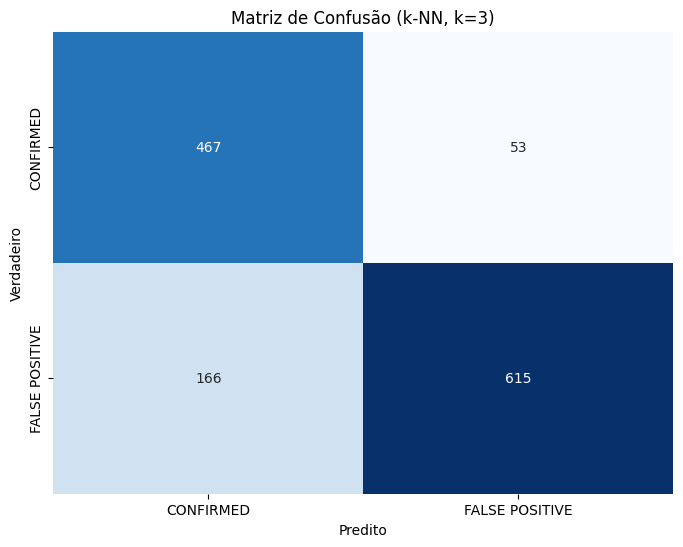

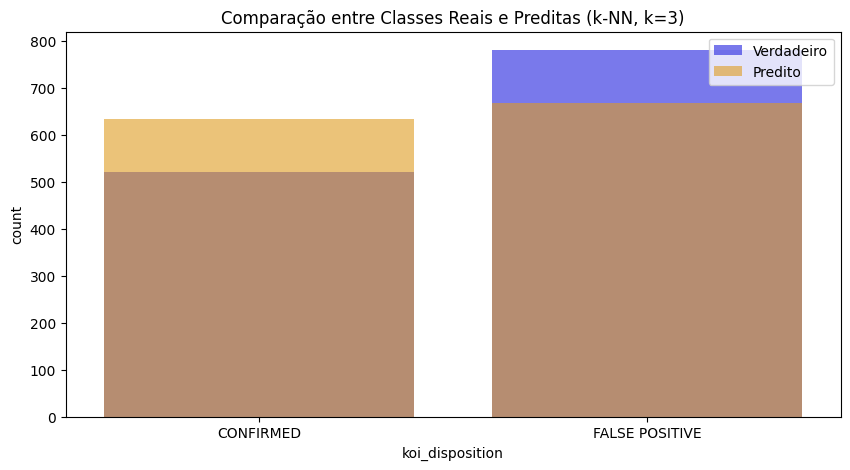

In [ ]:
avaliar_knn(3)

Teste feito com 5 vizinhos.

Acurácia (k-NN, k=5): 83.32%
Acurácia média (k-fold=5): 82.37%

Relatório de Classificação:
                precision    recall  f1-score   support

     CONFIRMED       0.73      0.92      0.82       520
FALSE POSITIVE       0.94      0.77      0.85       781

      accuracy                           0.83      1301
     macro avg       0.83      0.85      0.83      1301
  weighted avg       0.86      0.83      0.83      1301



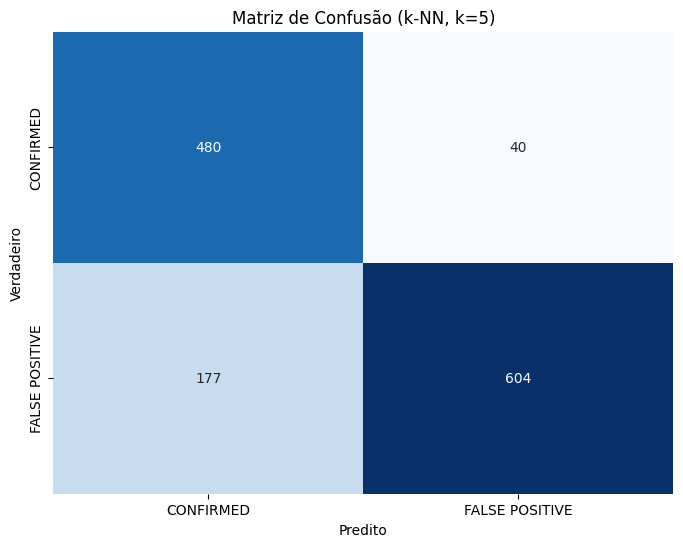

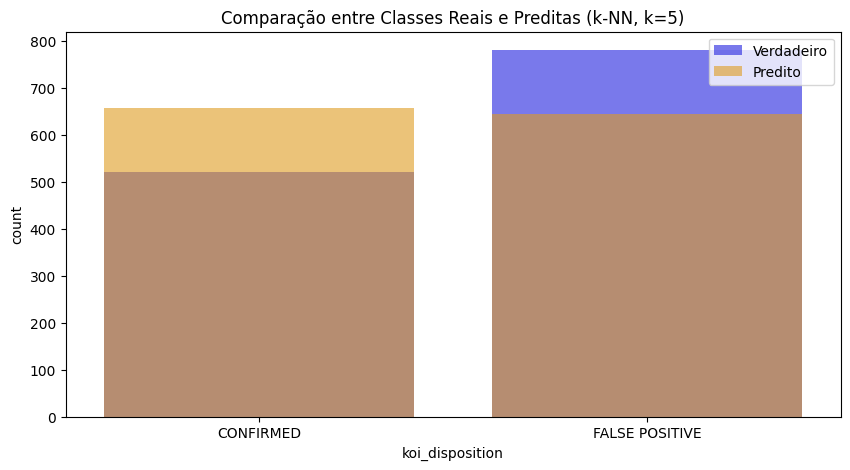

In [ ]:
avaliar_knn(5)

Teste feito com 9 vizinhos.

Acurácia (k-NN, k=9): 82.71%
Acurácia média (k-fold=5): 82.45%

Relatório de Classificação:
                precision    recall  f1-score   support

     CONFIRMED       0.72      0.92      0.81       520
FALSE POSITIVE       0.94      0.76      0.84       781

      accuracy                           0.83      1301
     macro avg       0.83      0.84      0.83      1301
  weighted avg       0.85      0.83      0.83      1301



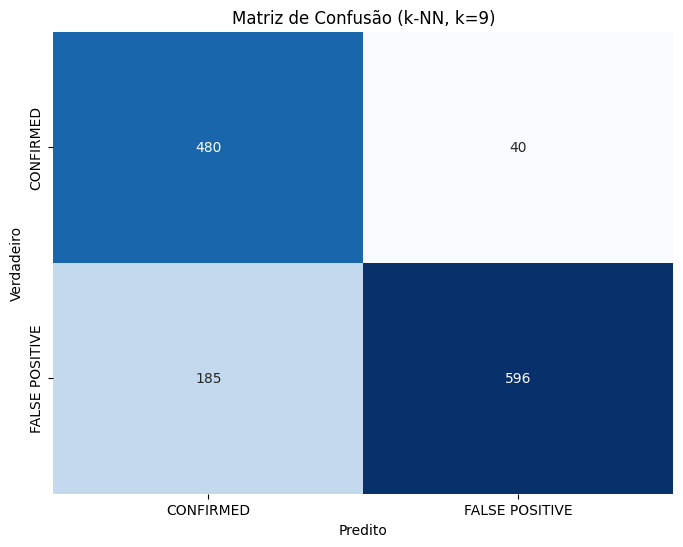

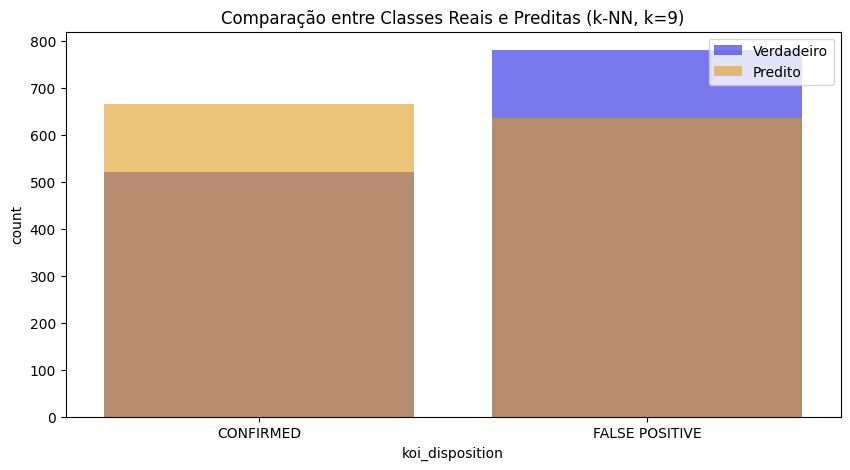

In [ ]:
avaliar_knn(9)

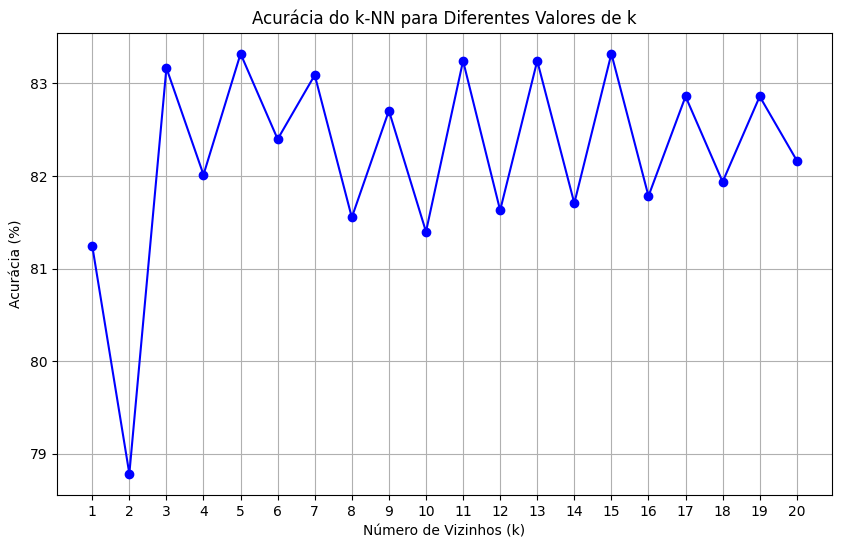

In [ ]:
def plotar_acuracia_knn():
    ks = range(1, 21)  # Testar valores de k de 1 a 20
    acuracias_knn = []

    for k in ks:
        modelo_knn = KNeighborsClassifier(n_neighbors=k)
        modelo_knn.fit(X_treino, y_treino)
        previsoes = modelo_knn.predict(X_teste)
        acuracia = accuracy_score(y_teste, previsoes)
        acuracias_knn.append(acuracia * 100)  # Acurácia em %

    # Plotando a Acurácia para diferentes valores de k
    plt.figure(figsize=(10, 6))
    plt.plot(ks, acuracias_knn, marker='o', linestyle='-', color='blue')
    plt.title('Acurácia do k-NN para Diferentes Valores de k')
    plt.xlabel('Número de Vizinhos (k)')
    plt.ylabel('Acurácia (%)')
    plt.grid(True)
    plt.xticks(ks)
    plt.show()

# Chamar a função para plotar o gráfico
plotar_acuracia_knn()

Ao analizar os resultados obtidos pode ser notado que o KNN se mantém com a acurácia entre 81 a 84% de precisão, com exceção do k=2 que teve o pior resultado sendo 79% como sendo um modelo com resultado relativamente "alto" porém longe de algo que seria agradável, sendo que esta aproximadamente 10% abaixo da nossa baseline o Naive Bayes

--------------------------------------------------------------------------------
# Random forest

O Random Forest é um algoritmo de aprendizado de máquina baseado em um conjunto de árvores de decisão. Ele opera criando múltiplas árvores de decisão em amostras aleatórias dos dados e, em seguida, combina suas previsões (por votação no caso de classificação) para obter um resultado final mais preciso e robusto. Essa técnica reduz o risco de overfitting das árvores individuais e melhora a capacidade de generalização do modelo.

Neste experimento, variamos o número de árvores (estimadores) da floresta para observar como isso impacta a acurácia do modelo. Testamos diferentes números de árvores, desde 50 até 500, e verificamos que, em geral, adicionar mais árvores melhora a precisão, mas com ganhos marginais após um certo ponto. O objetivo foi identificar o número ideal de árvores que maximize a acurácia sem aumentar desnecessariamente o tempo de processamento.

In [ ]:
from sklearn.ensemble import RandomForestClassifier


def avaliar_random_forest(n_arvores):
    # Passo 1: Inicializar o modelo Random Forest com um número específico de árvores
    modelo_rf = RandomForestClassifier(n_estimators=n_arvores, random_state=300)

    # Passo 2: Treinar o modelo
    modelo_rf.fit(X_treino, y_treino)

    # Passo 3: Fazer previsões nos dados de teste
    previsoes = modelo_rf.predict(X_teste)

    # Passo 4: Avaliar o modelo com a acurácia
    acuracia = accuracy_score(y_teste, previsoes)
    print(f"Acurácia (Random Forest, {n_arvores} árvores): {acuracia*100:.2f}%")

    # Passo 5: realizar testes com o k-fold=5
    pontuacaok = cross_val_score(modelo_rf, dados_escalonados, alvo, cv=5, scoring='accuracy')
    print(f'Acurácia média (k-fold=5): {pontuacaok.mean()*100:.2f}%')

    # Relatório de classificação
    print("\nRelatório de Classificação:")
    print(classification_report(y_teste, previsoes))

    # Passo 5: Usar a função para gerar a matriz de confusão e gráficos de barras
    plotar_resultados(y_teste, previsoes, modelo_rf.classes_,
                      titulo_matriz=f'Matriz de Confusão (Random Forest, {n_arvores} árvores)',
                      titulo_comparacao=f'Comparação entre Classes Reais e Preditas (Random Forest, {n_arvores} árvores)')


Random forest com 50 árvores

Acurácia (Random Forest, 50 árvores): 96.85%
Acurácia média (k-fold=5): 96.56%

Relatório de Classificação:
                precision    recall  f1-score   support

     CONFIRMED       0.96      0.97      0.96       520
FALSE POSITIVE       0.98      0.97      0.97       781

      accuracy                           0.97      1301
     macro avg       0.97      0.97      0.97      1301
  weighted avg       0.97      0.97      0.97      1301



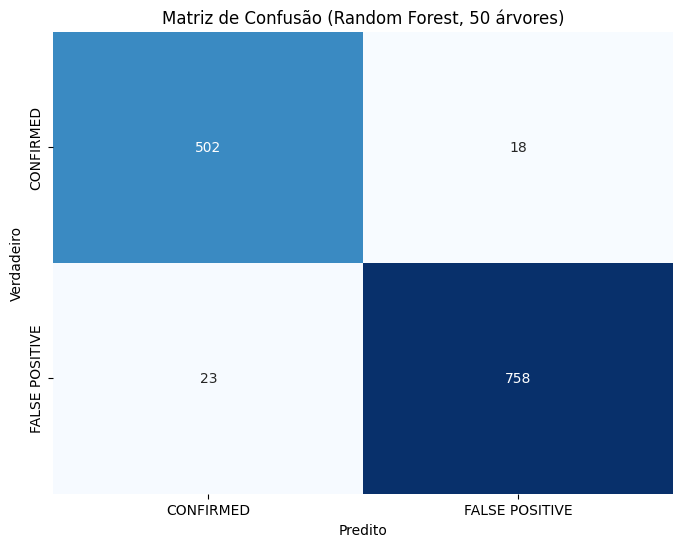

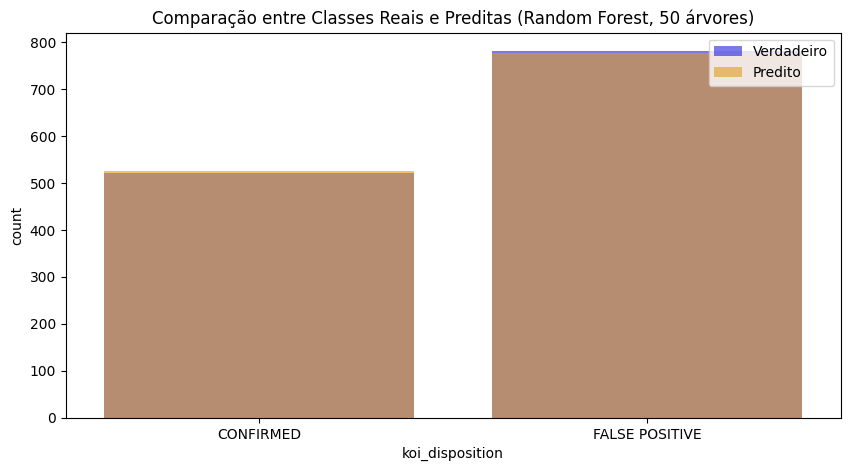

In [ ]:
avaliar_random_forest(50)

Random forest com 200 árvores

Acurácia (Random Forest, 200 árvores): 97.23%
Acurácia média (k-fold=5): 96.62%

Relatório de Classificação:
                precision    recall  f1-score   support

     CONFIRMED       0.96      0.97      0.97       520
FALSE POSITIVE       0.98      0.97      0.98       781

      accuracy                           0.97      1301
     macro avg       0.97      0.97      0.97      1301
  weighted avg       0.97      0.97      0.97      1301



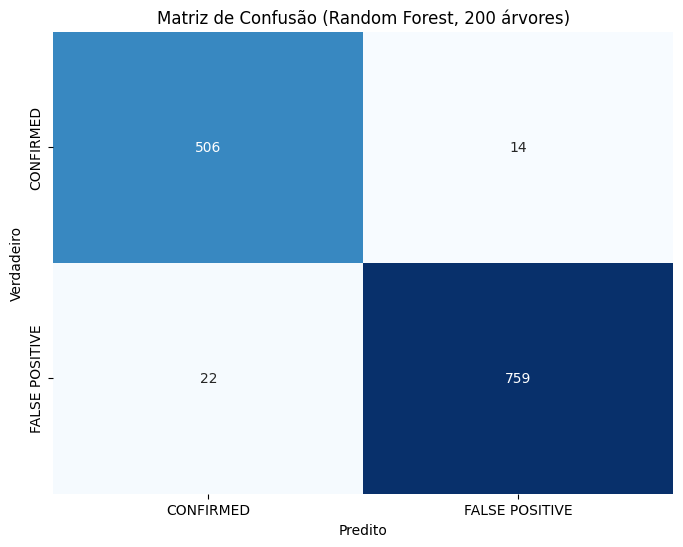

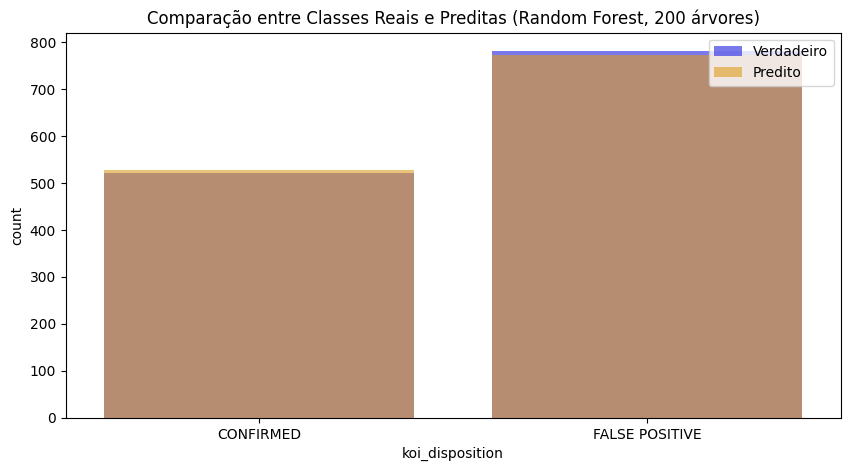

In [ ]:
avaliar_random_forest(200)

Random forest com 500 árvores

Acurácia (Random Forest, 500 árvores): 97.39%
Acurácia média (k-fold=5): 96.67%

Relatório de Classificação:
                precision    recall  f1-score   support

     CONFIRMED       0.96      0.97      0.97       520
FALSE POSITIVE       0.98      0.97      0.98       781

      accuracy                           0.97      1301
     macro avg       0.97      0.97      0.97      1301
  weighted avg       0.97      0.97      0.97      1301



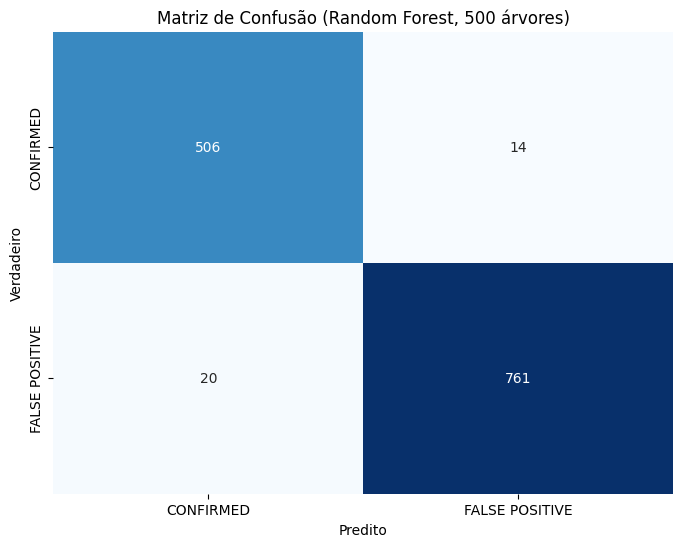

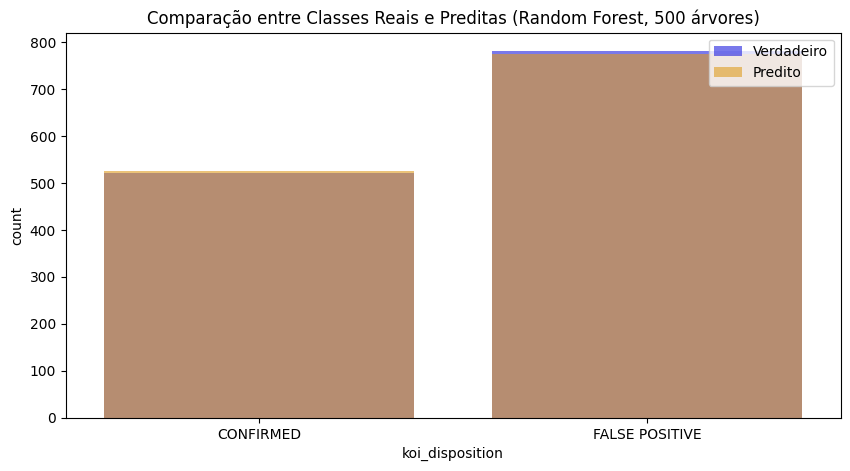

In [ ]:
avaliar_random_forest(500)

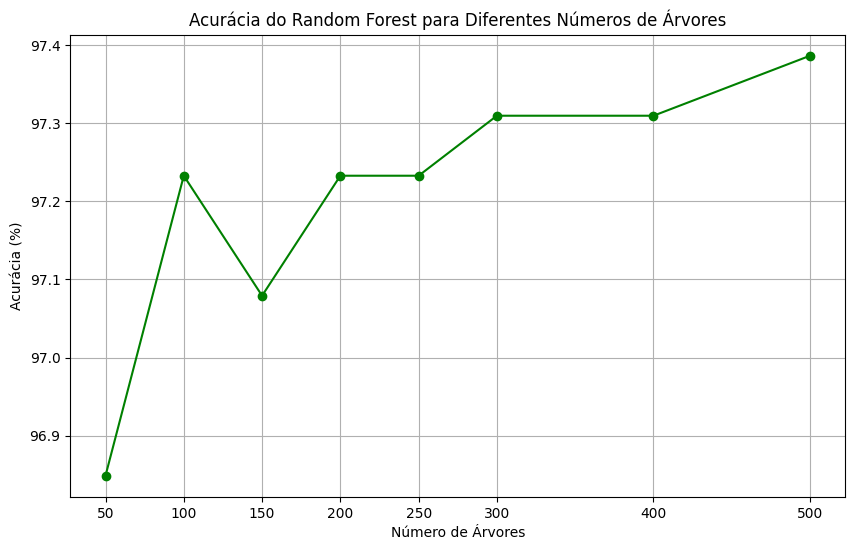

In [ ]:
num_arvores = [50, 100, 150, 200, 250, 300, 400, 500]  # Números de árvores a serem testados
acuracias_rf = []

for n in num_arvores:
    modelo_rf = RandomForestClassifier(n_estimators=n, random_state=300)
    modelo_rf.fit(X_treino, y_treino)
    previsoes = modelo_rf.predict(X_teste)
    acuracia = accuracy_score(y_teste, previsoes)
    acuracias_rf.append(acuracia * 100)  # Acurácia em %

# Plotando a Acurácia para diferentes números de árvores
plt.figure(figsize=(10, 6))
plt.plot(num_arvores, acuracias_rf, marker='o', linestyle='-', color='green')
plt.title('Acurácia do Random Forest para Diferentes Números de Árvores')
plt.xlabel('Número de Árvores')
plt.ylabel('Acurácia (%)')
plt.grid(True)
plt.xticks(num_arvores)
plt.show()

Os resultados do obtidos pelo k-fold mostram uma grande acurácia do modelo Random Forest. Sendo um dos modelos com o maior destaque na exatidão dentre todos, sendo em média 5% maior que o os 92% da acuracia do modelo Naive Bayes tendo maior destaque do teste feito com maior número de arvores

--------------------------------------------------------------------------------
# Gradient Tree Boosting.

O Gradient Boosting é um algoritmo de aprendizado de máquina baseado no conceito de combinar vários modelos fracos (geralmente árvores de decisão simples) em sequência para formar um modelo forte. A cada iteração, ele ajusta os erros do modelo anterior, criando um modelo final mais preciso e robusto. Esse processo de aprimoramento gradual faz com que o Gradient Boosting seja particularmente eficaz em capturar padrões complexos.

Neste experimento, utilizamos o Gradient Tree Boosting para testar diferentes números de iterações (ou estimadores), o que influencia diretamente a capacidade do modelo de aprender com os dados. Quanto maior o número de iterações, mais o modelo tenta corrigir seus erros, mas há o risco de overfitting se o número for excessivo. O objetivo foi encontrar o número ideal de iterações que maximize a acurácia sem comprometer a generalização do modelo.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


def avaliar_gradient_boosting(n_iteracoes):
    # Passo 1: Inicializar o modelo Gradient Boosting com um número específico de iterações
    modelo_gb = GradientBoostingClassifier(n_estimators=n_iteracoes, random_state=300)

    # Passo 2: Treinar o modelo
    modelo_gb.fit(X_treino, y_treino)

    # Passo 3: Fazer previsões nos dados de teste
    previsoes = modelo_gb.predict(X_teste)

    # Passo 4: Avaliar o modelo com a acurácia
    acuracia = accuracy_score(y_teste, previsoes)
    print(f"Acurácia (Gradient Boosting, {n_iteracoes} iterações): {acuracia*100:.2f}%")

    # Passo 5: realizar testes com o k-fold=5
    pontuacaok = cross_val_score(modelo_gb, dados_escalonados, alvo, cv=5, scoring='accuracy')
    print(f'Acurácia média (k-fold=5): {pontuacaok.mean()*100:.2f}%')

    # Relatório de classificação
    print("\nRelatório de Classificação:")
    print(classification_report(y_teste, previsoes))

    # Passo 5: Usar a função para gerar a matriz de confusão e gráficos de barras
    plotar_resultados(y_teste, previsoes, modelo_gb.classes_,
                      titulo_matriz=f'Matriz de Confusão (Gradient Boosting, {n_iteracoes} iterações)',
                      titulo_comparacao=f'Comparação entre Classes Reais e Preditas (Gradient Boosting, {n_iteracoes} iterações)')

Teste com 50 iterações

Acurácia (Gradient Boosting, 50 iterações): 97.00%
Acurácia média (k-fold=5): 96.39%

Relatório de Classificação:
                precision    recall  f1-score   support

     CONFIRMED       0.95      0.98      0.96       520
FALSE POSITIVE       0.98      0.97      0.97       781

      accuracy                           0.97      1301
     macro avg       0.97      0.97      0.97      1301
  weighted avg       0.97      0.97      0.97      1301



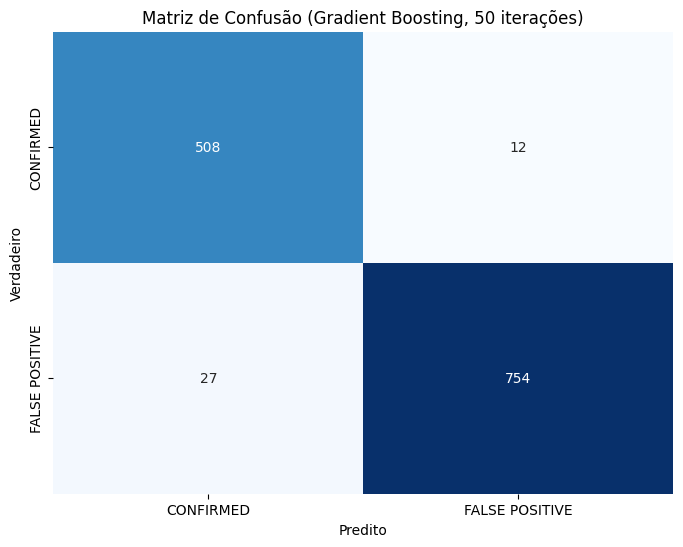

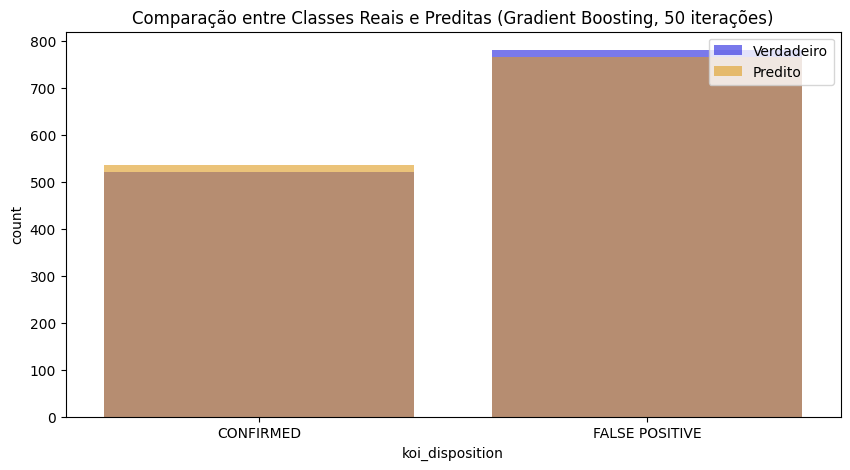

In [ ]:
avaliar_gradient_boosting(50)

Teste com 200 iterações

Acurácia (Gradient Boosting, 200 iterações): 97.62%
Acurácia média (k-fold=5): 96.71%

Relatório de Classificação:
                precision    recall  f1-score   support

     CONFIRMED       0.96      0.98      0.97       520
FALSE POSITIVE       0.98      0.98      0.98       781

      accuracy                           0.98      1301
     macro avg       0.97      0.98      0.98      1301
  weighted avg       0.98      0.98      0.98      1301



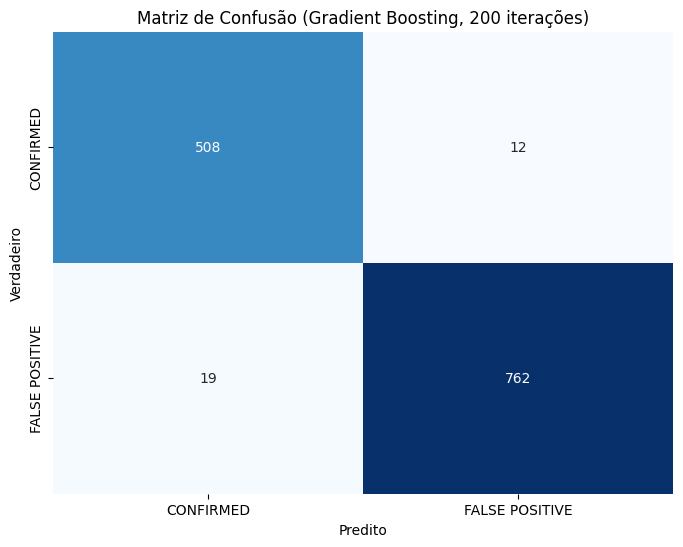

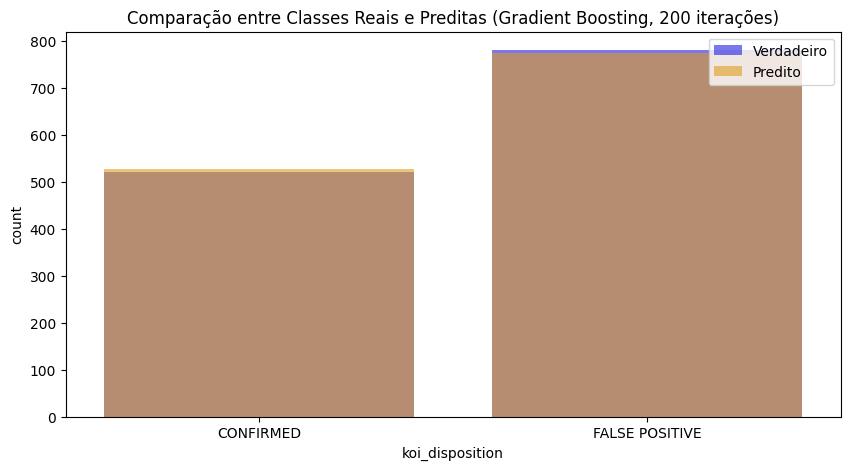

In [ ]:
avaliar_gradient_boosting(200)

Teste com 500 iterações

Acurácia (Gradient Boosting, 500 iterações): 97.54%
Acurácia média (k-fold=5): 96.94%

Relatório de Classificação:
                precision    recall  f1-score   support

     CONFIRMED       0.96      0.98      0.97       520
FALSE POSITIVE       0.99      0.97      0.98       781

      accuracy                           0.98      1301
     macro avg       0.97      0.98      0.97      1301
  weighted avg       0.98      0.98      0.98      1301



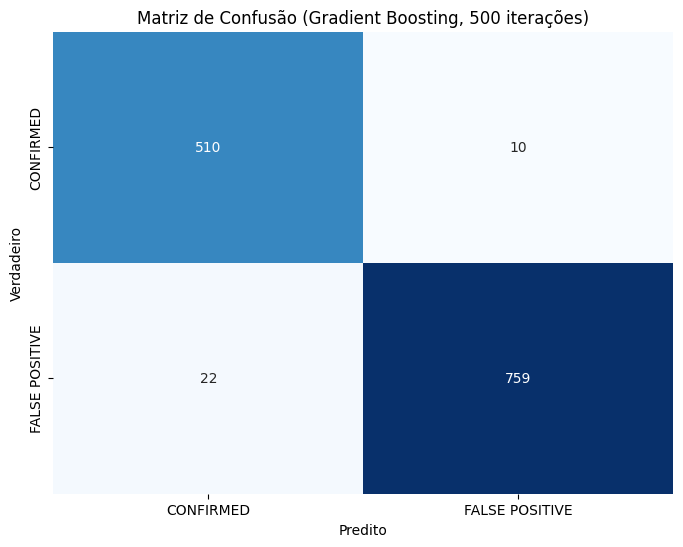

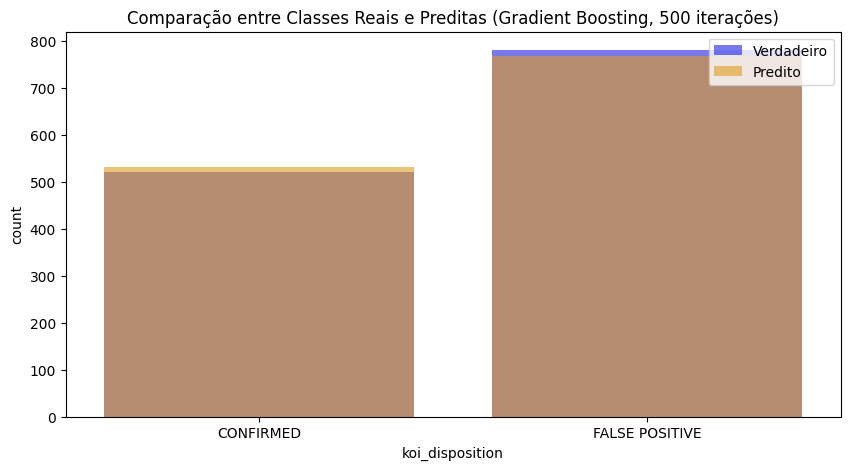

In [ ]:
avaliar_gradient_boosting(500)

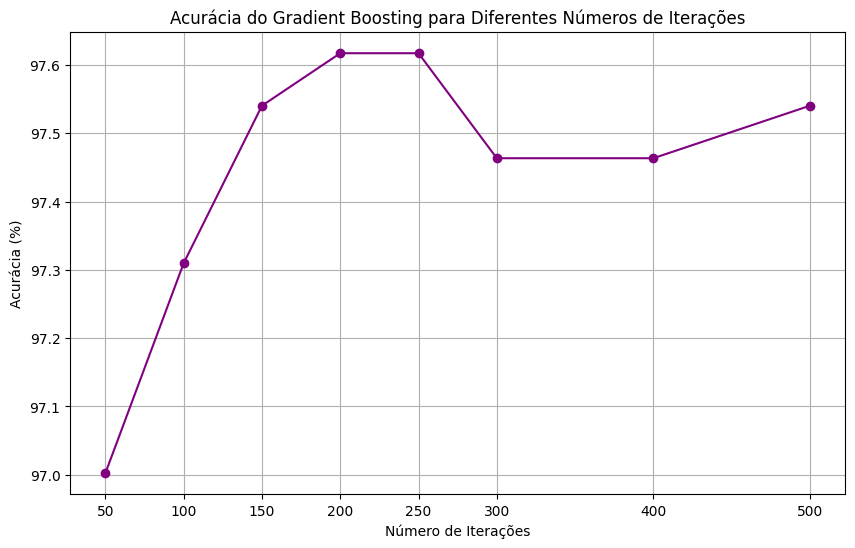

In [ ]:
def plotar_acuracia_gb():
    num_iteracoes = [50, 100, 150, 200, 250, 300, 400, 500]  # Números de iterações a serem testados
    acuracias_gb = []

    for n in num_iteracoes:
        modelo_gb = GradientBoostingClassifier(n_estimators=n, random_state=300)
        modelo_gb.fit(X_treino, y_treino)
        previsoes = modelo_gb.predict(X_teste)
        acuracia = accuracy_score(y_teste, previsoes)
        acuracias_gb.append(acuracia * 100)  # Acurácia em %

    # Plotando a Acurácia para diferentes números de iterações
    plt.figure(figsize=(10, 6))
    plt.plot(num_iteracoes, acuracias_gb, marker='o', linestyle='-', color='purple')
    plt.title('Acurácia do Gradient Boosting para Diferentes Números de Iterações')
    plt.xlabel('Número de Iterações')
    plt.ylabel('Acurácia (%)')
    plt.grid(True)
    plt.xticks(num_iteracoes)
    plt.show()

# Chamar a função para plotar o gráfico
plotar_acuracia_gb()


No final dos testes podemos verificar que este também, juntamente com o random forest é um dos modelos com maior acurácia entre os outros modelos testados, tendo o maior destaque o teste com k-fold que teve resultado aproximadamente 97% de precisão, sendo o maior de todos os testes e maior marca do trabalho inteiro. Obteve a média de 6% maior que a baseline Naive Bayes e a mais adequada para testes na base de dados utilizada.





--------------------------------------------------------------------------------
# Conclusão


Como conclusão geral deste experimento, os resultados obtidos foram bastante satisfatórios e contribuíram significativamente para o meu conhecimento sobre inteligência artificial e modelos de classificação. A implementação e análise de diversos algoritmos, como Naive Bayes, Decision Tree, SVM, k-NN, Random Forest e Gradient Boosting, permitiram explorar suas particularidades, pontos fortes e limitações.

Em termos de performance, o Gradient Boosting se destacou, apresentando uma acurácia 6% superior em relação ao baseline definido pelo modelo Naive Bayes. Esse ganho mostra a capacidade do Gradient Boosting de melhorar a precisão do modelo à medida que corrige erros iterativamente. No geral, o processo foi enriquecedor e contribuiu para a minha compreensão prática dos algoritmos de classificação.